### Datasets
    - gdsc --> gg
    - ctrp --> cc
### Models
    - lgb
    - nn0
    - nn1

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from load_modules import *
%matplotlib inline
fpath = Path(os.getcwd())
print('Current path', fpath)

### Path to data

In [2]:
fname = 'all_scores.csv'
dpath = Path('../lc.out')
dirs = sorted(dpath.glob('*'))
# dirs = glob(str(dpath/'*'))
print(dirs)

[PosixPath('../lc.out/lc_ctrp_lgb_default'), PosixPath('../lc.out/lc_gdsc_lgb_default')]


In [3]:
c_lgb_path = dpath/dirs[0]
g_lgb_path = dpath/dirs[1]

### Load data

In [4]:
c_lgb = pd.read_csv(c_lgb_path/fname); c_lgb.rename(columns={'split': 'run'}, inplace=True)
g_lgb = pd.read_csv(g_lgb_path/fname); g_lgb.rename(columns={'split': 'run'}, inplace=True)

In [5]:
# Global plotting params
# -------------------------------
met = 'mean_absolute_error'
t_set = 'te'

In [6]:
# Slice data
# -------------------------------
c_lgb = c_lgb[c_lgb['metric']==met].reset_index(drop=True)

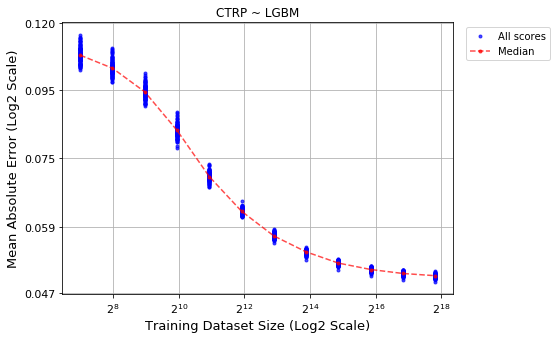

In [7]:
# Plot
# -------------------------------
# kwargs = {'tr_set': 'te', 'xtick_scale': 'log2', 'ytick_scale': 'log2'}
# lc_plots.plot_lc_many_metric( lc_scores, outdir=rout, **kwargs )
# lc_plots.plot_lc( lc_scores, outdir=rout, **kwargs )

kwargs = {'metric_name': met, 'tr_set': t_set, 'xtick_scale': 'log2', 'ytick_scale': 'log2', 'plot_median': True, 'title': 'CTRP ~ LGBM'}
ax = lc_plots.plot_lc_single_metric(c_lgb, **kwargs);

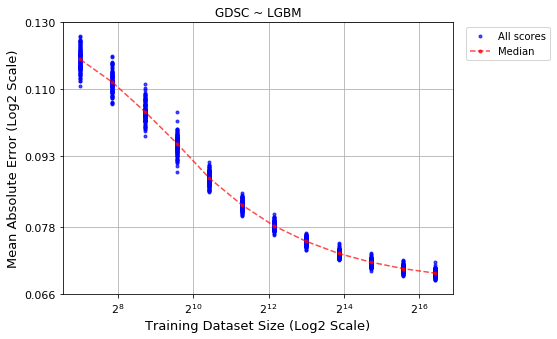

In [8]:
# Plot
# -------------------------------
kwargs = {'metric_name': met, 'tr_set': t_set, 'xtick_scale': 'log2', 'ytick_scale': 'log2', 'plot_median': True, 'title': 'GDSC ~ LGBM'}
lc_plots.plot_lc_single_metric(g_lgb, **kwargs);

### Fitting

In [9]:
data = g_lgb[g_lgb['metric']==met].reset_index(drop=True)
agg = g_lgb[g_lgb['metric']==met].groupby('tr_size').agg({'score': 'median'}).reset_index()
xf = agg['tr_size'].values
yf = agg['score'].values
# display(data[:2])
# display(agg[:2])

In [10]:
# from nls_lm import biased_powerlaw, fit_params
# import rpy2.robjects as robjects

# prms_lgb = fit_params(xf, yf)
# yfit = biased_powerlaw(xf, **prms_lgb)

In [11]:
w = xf
model = fit_model(xf, yf, w)

R[write to console]: Loading required package: dplyr

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Loading required package: tibble

R[write to console]: Loading required package: minpack.lm

